<a href="https://colab.research.google.com/github/Kr9096/Machine-Learning-Projects/blob/main/Fake_News_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detector

**Do you trust all the news you hear from social media?**

**All news are not real, right?**

**How will you detect fake news? **

We will try to answer this questions in this notebook.

Before moving ahead in this machine learning project, get aware of the terms related to it like **fake news, tfidfvectorizer, PassiveAggressive Classifier.**

**What is Fake News?**

A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

**What is a TfidfVectorizer?**

**TF (Term Frequency): **The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency):** Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

**What is a PassiveAggressiveClassifier?**

Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

# Import the required libraries

In [ ]:

import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Import the data

In [ ]:



df = pd.read_csv("/content/drive/MyDrive/Data Analysis/news.csv")

In [ ]:
# basic insights about the data
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df.sample(5)

,Unnamed: 0,title,text,label
3499,8921,No Pain No Gain? Lockheed Struggles to Finaliz...,Get short URL 0 8 0 0 US defense contractor Lo...,FAKE
5226,8418,"Fearing Election Day Trouble, Some US Schools ...","Fearing Election Day Trouble, Some US Schools ...",FAKE
3237,2639,Thousands of rape kits left untested despite f...,"In 1997, he followed a 15-year-old home from s...",REAL
4352,5642,Save the Children Norway trialed anti-malaria ...,Save the Children Norway trialed anti-malaria ...,FAKE
903,1364,Iowa nightmare revisited: Was correct winner c...,DES MOINES — It's Iowa's nightmare scenario re...,REAL


In [ ]:
#df["text"][2]
df.shape

(6335, 4)

In [ ]:
df.isnull().sum() # We dont have any null values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

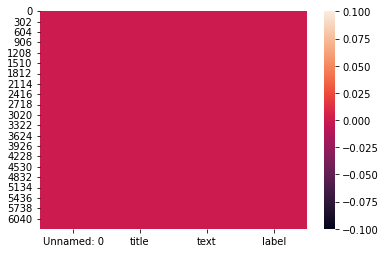

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull())

# Seperate the Y-label( Dependent column )

In [ ]:
y = df["label"]
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Split the dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df["text"],y,test_size = 0.2,random_state = 7)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(5068,)
(5068,)


In [ ]:
X_test.shape

(1267,)

# TfidfVectorizer 

In [ ]:
tfidf_v = TfidfVectorizer(stop_words='english',max_df=0.7)

# Fit and Transform Train data set and only transform Test dataset.

tfidf_train = tfidf_v.fit_transform(X_train)
tfidf_test = tfidf_v.transform(X_test)

# Initialize the PassiveAggressiveClassifier

In [ ]:
Pac = PassiveAggressiveClassifier(max_iter = 50)
Pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
# Let's find the accuracy

y_pred = Pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f"accuracy: {round(score * 100,2)}%") # We go an accuracy of 93%.

accuracy: 93.05%


# Confusion Matrix

In [ ]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[592,  46],
       [ 42, 587]])

So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.

In [ ]:
#Pac.predict("My name is my name is my name is")
tfidf_v.transform("My name is my name is my name is")

ValueError: ignored

In [ ]:
pd.Dataframe("main":{"m"})